<a href="https://colab.research.google.com/github/V6388/cardiao_fitness/blob/main/cardio_fitness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
cgd=pd.read_csv('CardioGoodFitness.csv')

In [ ]:
cgd.tail(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
170,TM798,31,Male,16,Partnered,6,5,89641,260
171,TM798,33,Female,18,Partnered,4,5,95866,200
172,TM798,34,Male,16,Single,5,5,92131,150
173,TM798,35,Male,16,Partnered,4,5,92131,360
174,TM798,38,Male,18,Partnered,5,5,104581,150
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [ ]:
cgd.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [ ]:
cgd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb67e81abe0>,
      dtype=object)

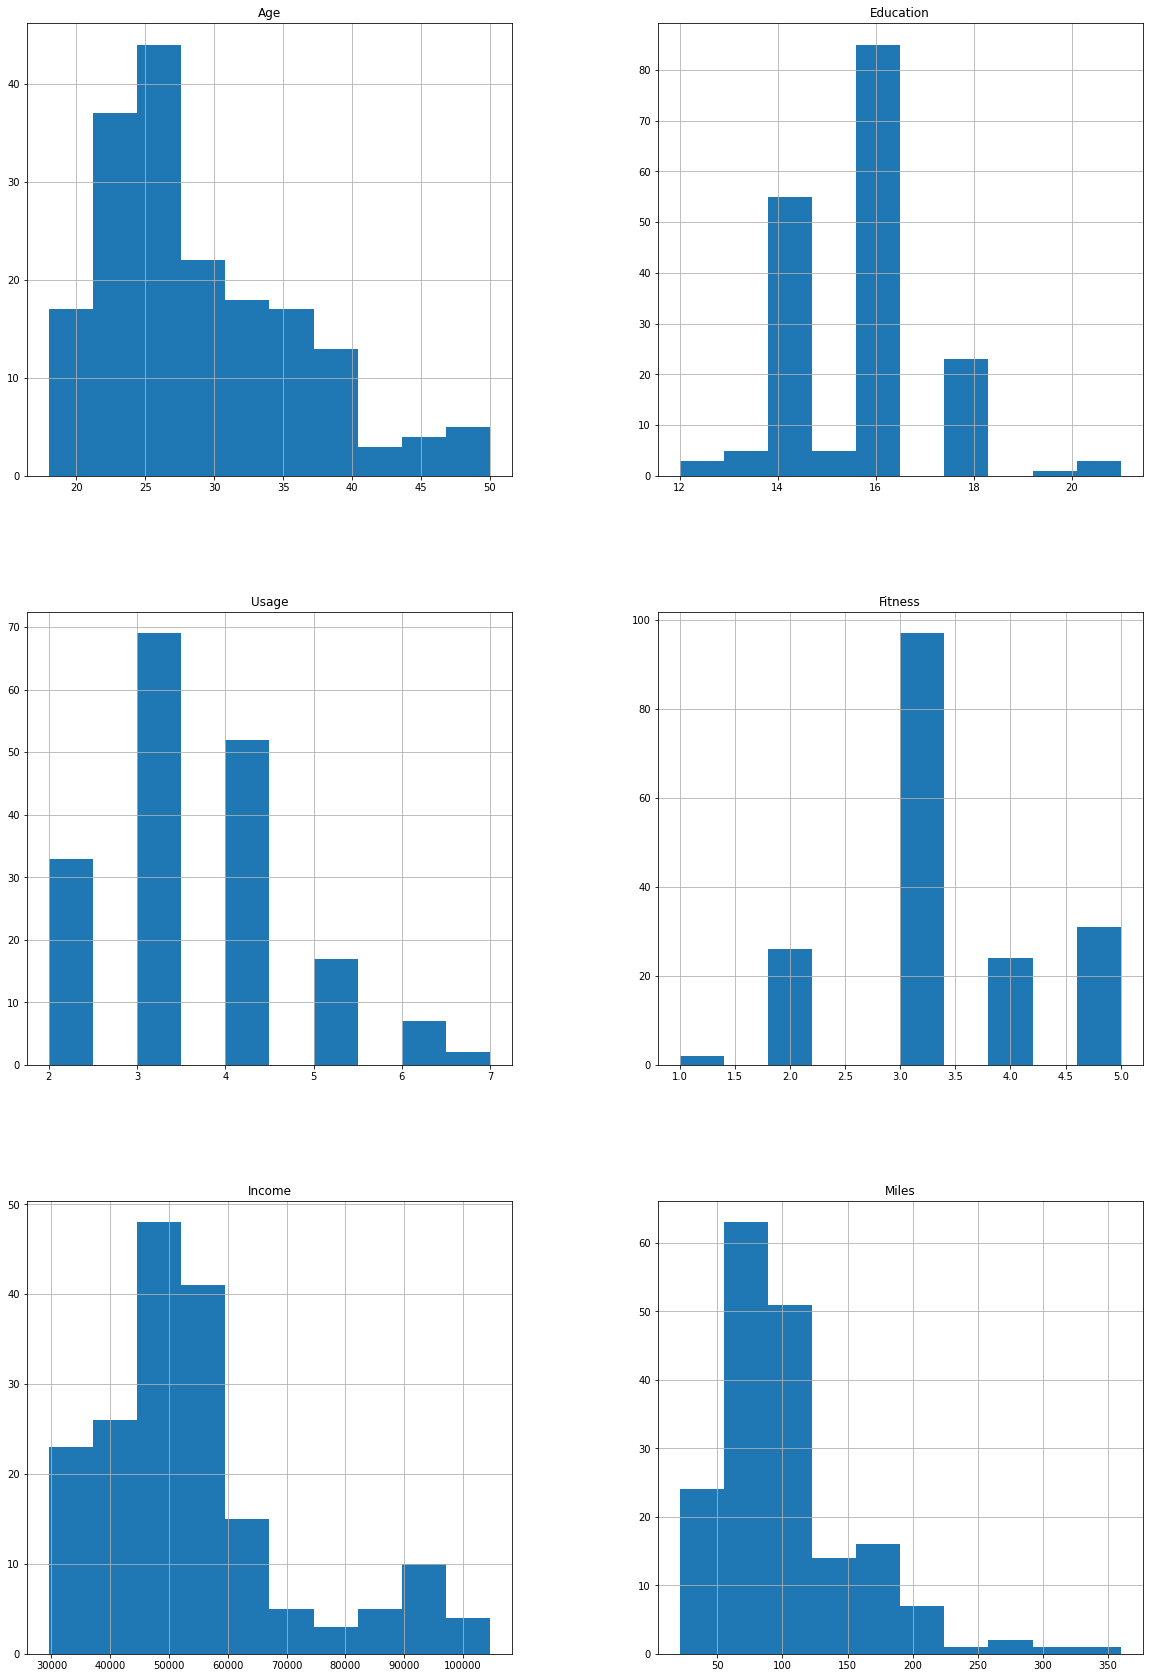

In [ ]:
import matplotlib.pyplot as plt
cgd.hist(figsize=(20,30))

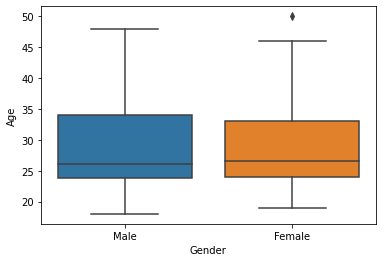

In [ ]:
import seaborn as sns
sns.boxplot(x="Gender",y="Age",data=cgd)

In [ ]:
pd.crosstab(cgd['Product'],cgd['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


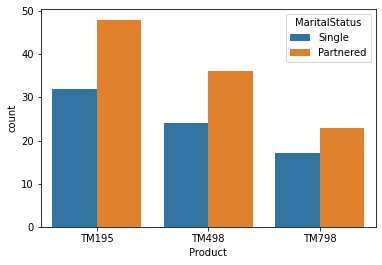

In [ ]:
sns.countplot(x='Product',hue='MaritalStatus',data=cgd)

In [ ]:
pd.pivot_table(cgd,index=['Product','Gender'],columns=['MaritalStatus'],aggfunc=len)

Age        Education  ...  Miles     Usage       
MaritalStatus  Partnered Single Partnered  ... Single Partnered Single
Product Gender                             ...                        
TM195   Female        27     13        27  ...     13        27     13
        Male          21     19        21  ...     19        21     19
TM498   Female        15     14        15  ...     14        15     14
        Male          21     10        21  ...     10        21     10
TM798   Female         4      3         4  ...      3         4      3
        Male          19     14        19  ...     14        19     14

[6 rows x 12 columns]

In [ ]:
pd.pivot_table(cgd,'Income',index=['Product','Gender'],columns=['MaritalStatus'])

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

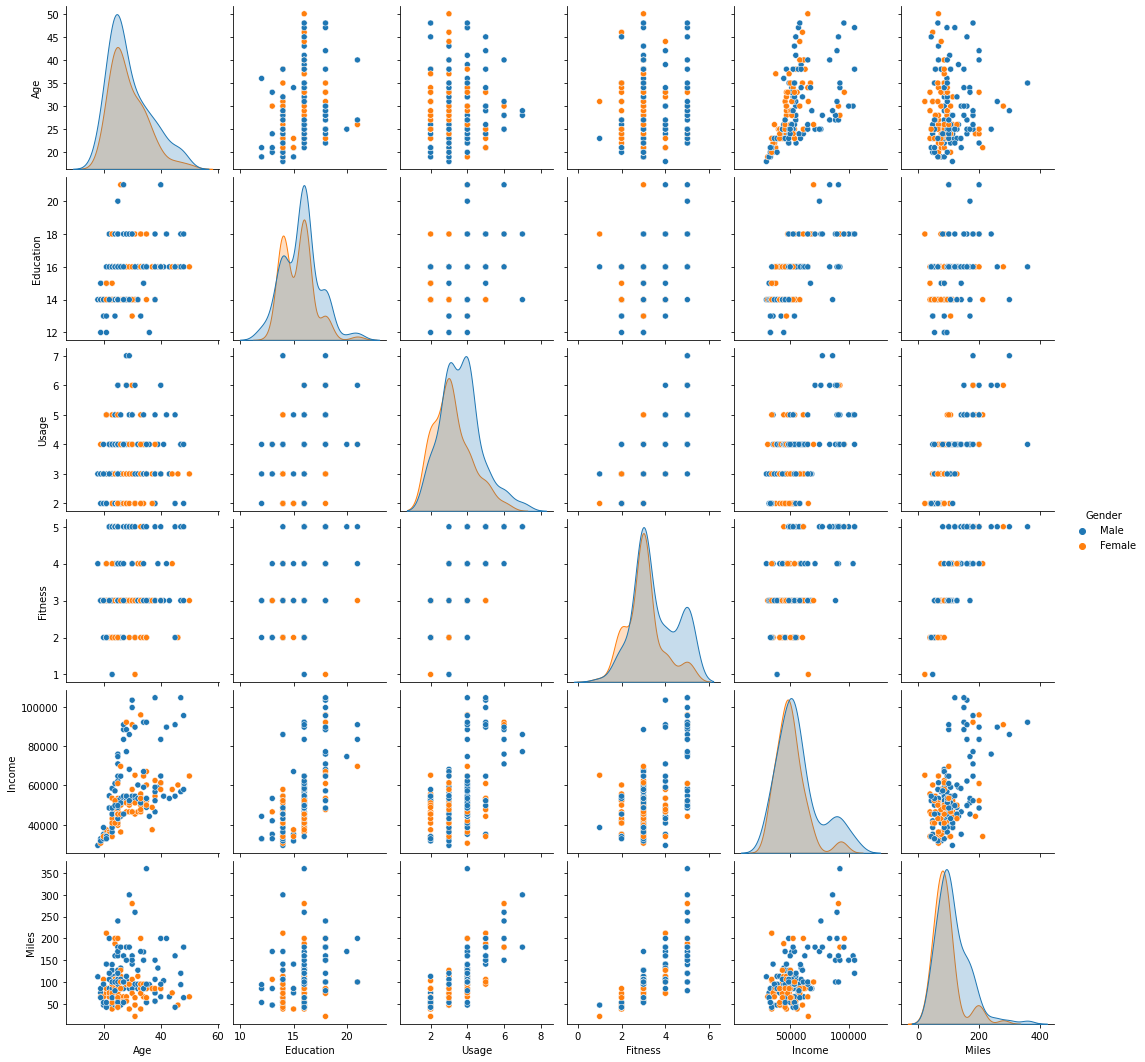

In [ ]:
sns.pairplot(cgd,hue='Gender')

In [ ]:
 cgd['Age'].std()

6.943498135399795

In [ ]:
cgd['Age'].mean()

28.788888888888888

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


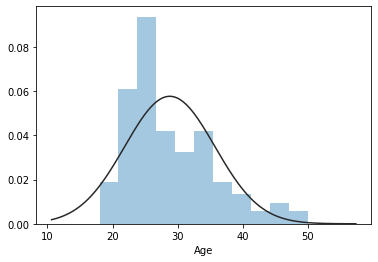

In [ ]:
from scipy.stats import norm
sns.distplot(cgd['Age'],fit=norm,kde=False)

In [ ]:
corr=cgd.corr()

In [ ]:
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


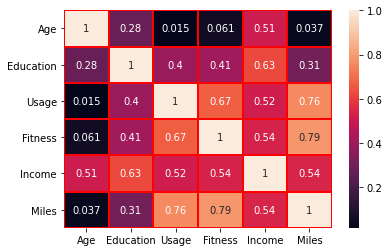

In [ ]:
sns.heatmap(corr,linecolor='red',linewidths=1,annot=True)

In [ ]:
from sklearn import linear_model

In [ ]:
reg=linear_model.LinearRegression()

In [ ]:
y=cgd['Miles']
x=cgd[['Usage','Fitness']]

In [ ]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
p=reg.coef_
p

array([20.21486334, 27.20649954])

In [ ]:
q=reg.intercept_
q

-56.74288178464862

UFuncTypeError: ignored